<a href="https://colab.research.google.com/github/shreyansh273/Jane-Street-Market-Prediction/blob/main/Jane_Street_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

**Importing files from Kaggle**

In [9]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [10]:
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c jane-street-market-prediction

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 64.7MB/s]
  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 56.7kB/s]
  0% 0.00/23.3k [00:00<?, ?B/s]
100% 23.3k/23.3k [00:00<00:00, 20.7MB/s]
 67% 11.0M/16.4M [00:00<00:00, 115MB/s]
100% 16.4M/16.4M [00:00<00:00, 105MB/s]
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 100MB/s]
100% 2.60G/2.61G [00:25<00:00, 58.2MB/s]
100% 2.61G/2.61G [00:25<00:00, 109MB/s] 


**Viewing the imported files**

In [12]:
!ls

competition.cpython-37m-x86_64-linux-gnu.so  features.csv  sample_data
example_sample_submission.csv		     __init__.py   train.csv.zip
example_test.csv.zip			     kaggle.json


In [66]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

**Importing train and test datasets into pandas dataframe**

In [14]:
train = pd.read_csv('train.csv.zip', compression='zip')
test = pd.read_csv('example_test.csv.zip', compression='zip')
features = pd.read_csv('features.csv')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [16]:
train.feature_0 = train.feature_0.astype(np.int8)
train.date= train.date.astype(np.int16)
train.ts_id = train.ts_id.astype(np.int32)

In [17]:
for i in train:
    if train[i].dtype == np.float64:
        if (((train[i] < .0001) & (train[i] > -.0001)).mean()) > .001:
            print(i)

weight
resp_1
resp_2
resp_3
resp_4
resp


In [18]:
for i in train:
    if train[i].dtype == np.float64:
        if (((train[i] < .0001) & (train[i] > -.0001)).mean()) < .001:
            train[i] = train[i].astype(np.float32)
            gc.collect();

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float32(129), float64(6), int16(1), int32(1), int8(1)
memory usage: 1.3 GB


In [20]:
train.sort_values(by= ['date','ts_id'],inplace=True)
train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,-1.055090,NaN,NaN,-2.667670,-2.001475,-1.703595,-2.196892,NaN,NaN,1.483295,1.307466,NaN,NaN,1.175200,0.967805,1.608410,1.319365,NaN,NaN,-0.515073,-0.448988,NaN,NaN,...,1.158770,NaN,3.754522,7.137163,-1.863069,NaN,0.434466,NaN,-0.292035,0.317003,-2.605820,NaN,2.896986,NaN,1.485813,4.147254,-2.238831,NaN,-0.892724,NaN,-0.156332,0.622816,-3.921523,NaN,2.561593,NaN,3.457757,6.649580,-1.472686,NaN,NaN,1.168391,8.313582,1.782433,14.018213,2.653056,12.600291,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,-0.384952,NaN,NaN,1.225838,0.789076,1.110580,1.102281,NaN,NaN,-0.590600,-0.625682,NaN,NaN,-0.543425,-0.547486,-0.706600,-0.667806,NaN,NaN,0.910558,0.914465,NaN,NaN,...,1.157670,NaN,1.297679,1.281956,-2.427595,NaN,0.024913,NaN,-0.413607,-0.073672,-2.434546,NaN,0.949879,NaN,0.724655,1.622137,-2.209020,NaN,-1.332492,NaN,-0.586619,-1.040491,-3.946097,NaN,0.983440,NaN,1.357907,1.612348,-1.664544,NaN,NaN,-1.178850,1.777472,-0.915459,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,2.668029,NaN,NaN,3.836342,2.183258,3.902698,3.045431,NaN,NaN,-1.141082,-0.979962,NaN,NaN,-1.157585,-0.966803,-1.430973,-1.103432,NaN,NaN,5.131559,4.314714,NaN,NaN,...,2.420089,NaN,0.800962,1.143664,-3.214578,NaN,1.585939,NaN,0.193996,0.953114,-2.674839,NaN,2.200085,NaN,0.537175,2.156228,-3.568648,NaN,1.193823,NaN,0.097345,0.796214,-4.090058,NaN,2.548596,NaN,0.882588,1.817895,-2.432424,NaN,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174379,0.344640,0.066872,0.009357,-1.006373,-0.676458,NaN,NaN,4.508206,2.484260,NaN,NaN,2.902176,1.799163,3.192700,2.848359,NaN,NaN,-1.401637,-1.428248,NaN,NaN,-1.421175,-1.487976,-1.756415,-1.647543,NaN,NaN,4.766181,4.528353,NaN,NaN,...,2.330484,NaN,0.182066,1.088451,-3.527752,NaN,-1.338859,NaN,-1.257774,-1.194013,-1.719062,NaN,-0.940190,NaN,-1.510224,-1.781693,-3.373969,NaN,2.513074,NaN,0.424964,1.992887,-2.616856,NaN,0.561528,NaN,-0.994041,0.099560,-2.485993,NaN,NaN,2.838853,0.499251,3.033731,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,NaN,NaN,2.683017,1.450991,NaN,NaN,1.257761,0.632336,0.905204,0.575275,NaN,NaN,2.550884,2.484082,NaN,NaN,2.502828,2.606440,2.731251,2.566561,NaN,NaN,-1.477905,-1.722451,NaN,NaN,...,4.345282,NaN,2.737738,2.602937,-1.785502,NaN,-0.172561,NaN,-0.299516,-0.420021,-2.354611,NaN,0.762192,NaN,1.598620,0.623132,-1.742540,NaN,-0.934675,NaN,-0.373013,-1.213540,-3.677787,NaN,2.684119,NaN,2.861848,2.134804,-1.279284,NaN,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [21]:
train['action'] = np.where(train['resp'] > 0,1,0)
train.action = train.action.astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


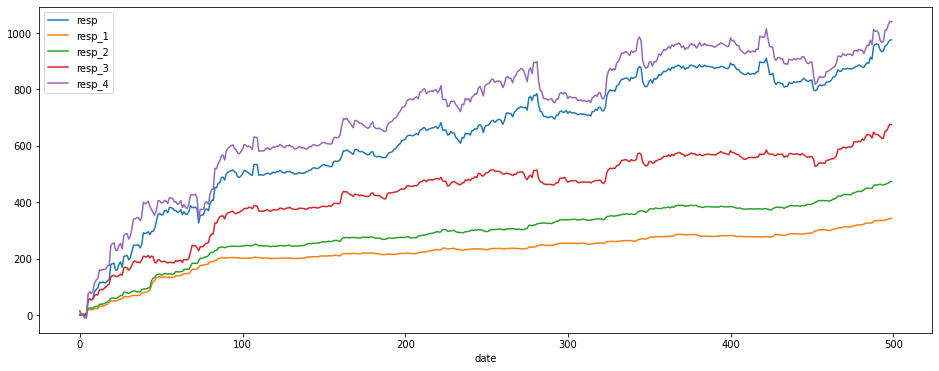

In [65]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp','resp_1','resp_2','resp_3','resp_4'].sum().cumsum().plot(ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


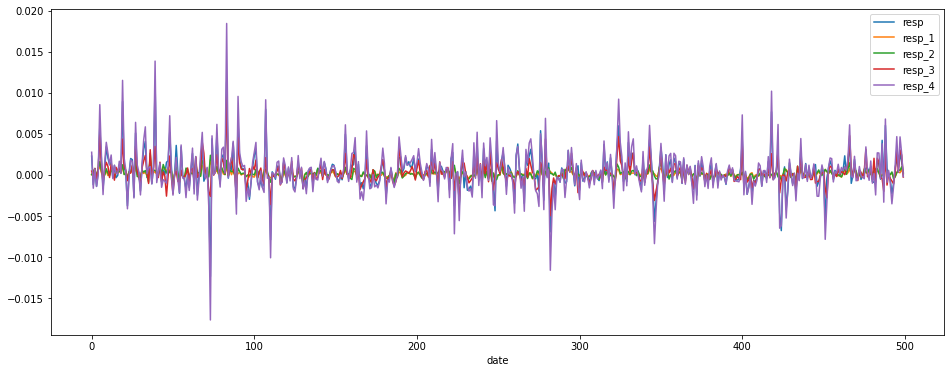

In [64]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp','resp_1','resp_2','resp_3','resp_4'].mean().plot(ax=ax)

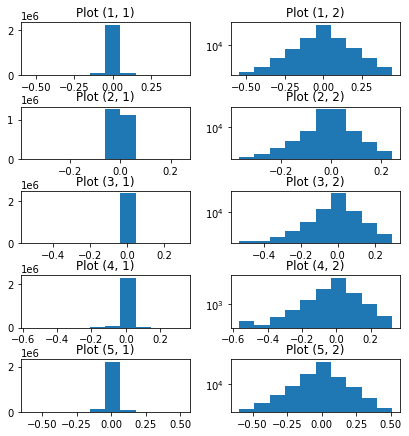

In [63]:
cols = ['resp','resp_1','resp_2','resp_3','resp_4']
n_rows = len(cols)
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols,figsize=(6,6))
fig.tight_layout() 
for row_num in range(n_rows):
    for col_num in range(n_cols):
        ax = axes[row_num][col_num]
        if(col_num==0):
          ax.hist(train[cols[row_num]])
        else:
          ax.hist(train[cols[row_num]], log=True)
        ax.set_title(f'Plot ({row_num+1}, {col_num+1})')

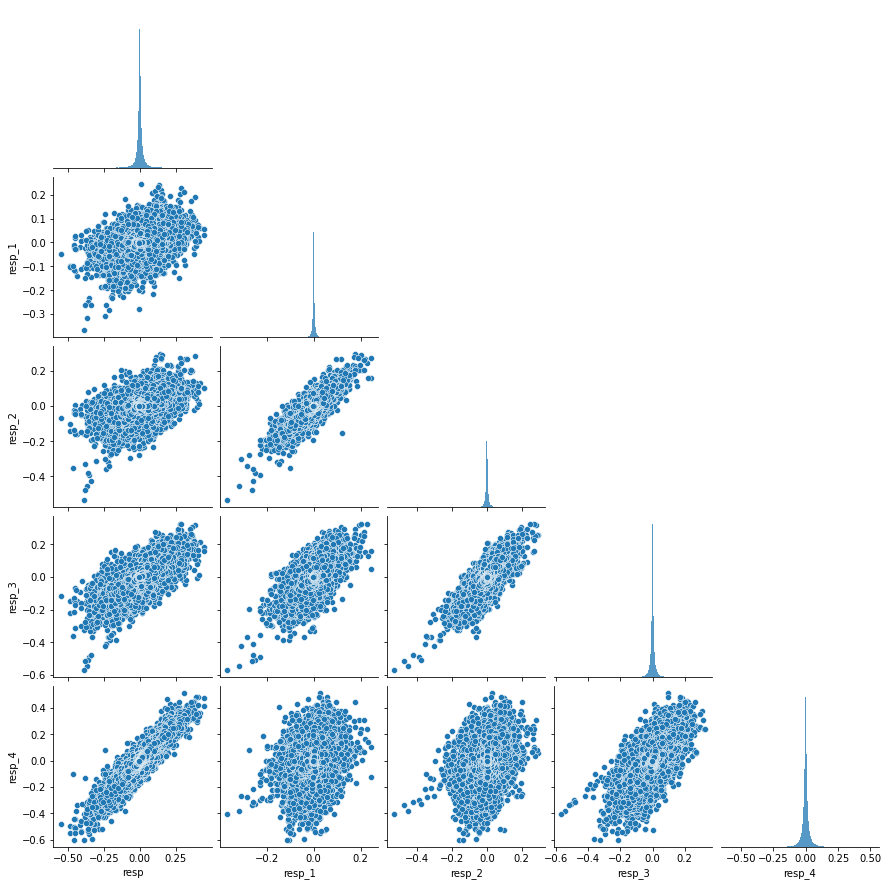

In [68]:
sns.pairplot(train[['resp','resp_1', 'resp_2', 'resp_3', 'resp_4']], corner=True)

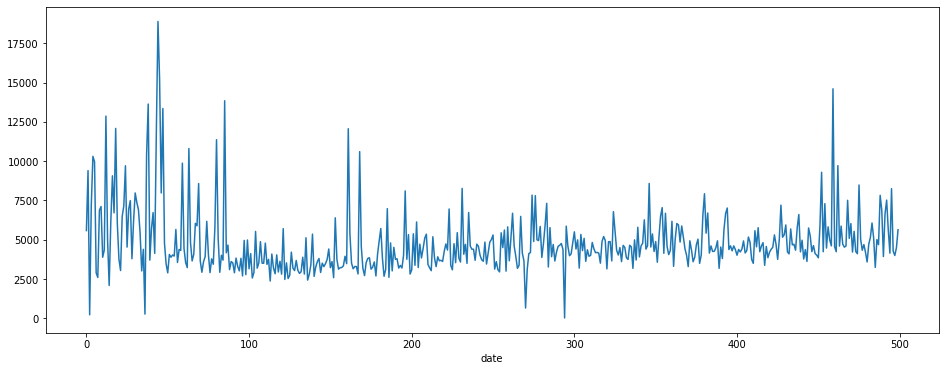

In [69]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp'].count().plot(ax=ax)

(array([8.000000e+00, 3.600000e+01, 3.930000e+02, 3.855000e+03,
        6.230800e+04, 2.246292e+06, 7.259800e+04, 4.639000e+03,
        3.260000e+02, 3.600000e+01]),
 array([-0.5493845 , -0.44959989, -0.34981528, -0.25003067, -0.15024607,
        -0.05046146,  0.04932315,  0.14910776,  0.24889237,  0.34867697,
         0.44846158]),
 <a list of 10 Patch objects>)

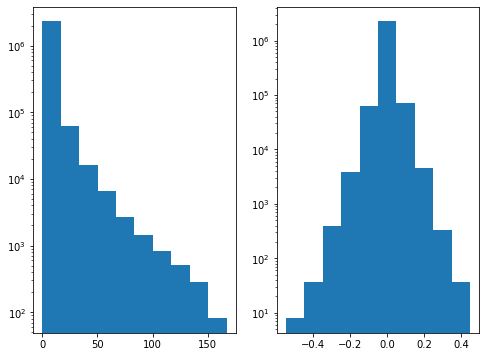

In [96]:
fig, axes = plt.subplots(1,2, figsize=(8,6))
ax = axes[0]
ax.hist(train.weight, log=True)
ax1 = axes[1]
ax1.hist(train.weight[train.weight!=0], log=True)

(array([1.890568e+06, 6.192100e+04, 1.639100e+04, 6.575000e+03,
        2.680000e+03, 1.443000e+03, 8.400000e+02, 5.030000e+02,
        2.840000e+02, 8.200000e+01]),
 array([6.91244239e-03, 1.67355927e+01, 3.34642730e+01, 5.01929532e+01,
        6.69216335e+01, 8.36503138e+01, 1.00378994e+02, 1.17107674e+02,
        1.33836355e+02, 1.50565035e+02, 1.67293715e+02]),
 <a list of 10 Patch objects>)

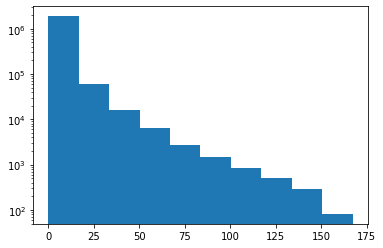

In [94]:
plt.hist(train.weight[train.weight!=0], log=True)